Comparing the different choices for the polynomials that are used for the recursion constructing the Trefftz basis. In 1+1 dimensions on a mesh with anisotropic elements.

In [1]:
N = 3
c=3
t_steps = c*N
order = 10
k = 1

In [2]:
import sys
sys.path.append("..")
from ngsolve import *
SetHeapSize(100*1000*1000)

from trefftzngs import *
from DGeq import *
from prodmesh import *

truesol =  sin( k*(c*y + x) )#exp(-pow(c*x+y,2)))#
v0 = c*k*cos(k*(c*y+x))#grad(U0)[0]
sig0 = -k*cos(k*(c*y+x))#-grad(U0)[1]
# U0 = GridFunction(fes)
# U0.Set(truesol)
# Draw(U0,mesh,'U0')

In [3]:
def error(gfu,truesol,fes):
    L2error = sqrt(Integrate((truesol - gfu)*(truesol - gfu), mesh))

    gradtruesol = CoefficientFunction((-sig0,v0))
    sH1error = sqrt(Integrate((gradtruesol - grad(gfu))*(gradtruesol - grad(gfu)), mesh))

    return [L2error,sH1error]

In [4]:
mesh = CartSquare(N,t_steps)
solution = []
for order in range(3,13):
    for btype in range(0,3):
        print("run order nr.: " + str(order))
        fes = FESpace("trefftzfespace", mesh, order = order, wavespeed = c, dgjumps=True, basistype = btype)
        [a,f] = DGeqsys(fes,truesol,v0,sig0,c,v0)
        [gfu, cond] = DGsolve(fes,a,f)
        [L2error,sH1error] = error(gfu,truesol,fes)
        solution.append([btype,order,cond,L2error,sH1error])
        print("btype: " + str(btype) + " cond: " + str(cond) + " L2error: " + str(L2error) + " H1error: "+ str(sH1error))

run order nr.: 3
btype: 0 cond: 56.5272744939 L2error: 3.821631991834629e-05 H1error: 0.0014374948722529976
run order nr.: 3
btype: 1 cond: 10785.2796755 L2error: 3.821631992538888e-05 H1error: 0.001437494872262535
run order nr.: 3
btype: 2 cond: 5893.65164712 L2error: 3.821631989688518e-05 H1error: 0.0014374948722505744
run order nr.: 4
btype: 0 cond: 181.351983107 L2error: 1.4907089506704745e-06 H1error: 6.0297312864034094e-05
run order nr.: 4
btype: 1 cond: 69525.478869 L2error: 1.4907089395179065e-06 H1error: 6.029731283758572e-05
run order nr.: 4
btype: 2 cond: 43835.3670409 L2error: 1.4907089382522642e-06 H1error: 6.0297312803966e-05
run order nr.: 5
btype: 0 cond: 497.726698446 L2error: 5.021470010522786e-08 H1error: 3.043852366506339e-06
run order nr.: 5
btype: 1 cond: 56369406.359 L2error: 5.021814470140293e-08 H1error: 3.043835452582696e-06
run order nr.: 5
btype: 2 cond: 25838885.033 L2error: 5.0213742893860204e-08 H1error: 3.043864090365836e-06
run order nr.: 6
btype: 0 con

/usr/local/lib/python3.5/dist-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.227519914725908e-17 / 1.1102230246251565e-16
  RuntimeWarning)


btype: 1 cond: 2.831053349e+15 L2error: 0.005250202726852833 H1error: 0.08621281670178743
run order nr.: 9
btype: 2 cond: 1.32026770895e+15 L2error: 0.0012202739371824118 H1error: 0.020789455795267663
run order nr.: 10
btype: 0 cond: 1771128.78032 L2error: 8.586506040192028e-15 H1error: 4.215140512963478e-13
run order nr.: 10


/usr/local/lib/python3.5/dist-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.5204636934729997e-19 / 1.1102230246251565e-16
  RuntimeWarning)


btype: 1 cond: 4.73471101814e+17 L2error: 1.0108256509046647 H1error: 14.05953271332162
run order nr.: 10


/usr/local/lib/python3.5/dist-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.9002132756141154e-18 / 1.1102230246251565e-16
  RuntimeWarning)


btype: 2 cond: 2.17837599059e+17 L2error: 0.15958388395300008 H1error: 1.8486476128683065
run order nr.: 11
btype: 0 cond: 6413153.84837 L2error: 9.82968833376936e-15 H1error: 1.2944868972014199e-12
run order nr.: 11


/usr/local/lib/python3.5/dist-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.915120540236293e-21 / 1.1102230246251565e-16
  RuntimeWarning)


btype: 1 cond: 5.48969519371e+17 L2error: 0.20850637668534186 H1error: 3.7367533365602874
run order nr.: 11


/usr/local/lib/python3.5/dist-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.1968023778076022e-19 / 1.1102230246251565e-16
  RuntimeWarning)


btype: 2 cond: 1.50547846666e+18 L2error: 0.249253478032838 H1error: 1.6323596175959076
run order nr.: 12
btype: 0 cond: 48213876.6193 L2error: 2.2753186327987e-14 H1error: 2.572751363037627e-12
run order nr.: 12


/usr/local/lib/python3.5/dist-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.422927903245904e-20 / 1.1102230246251565e-16
  RuntimeWarning)


btype: 1 cond: 5.68797984476e+18 L2error: 0.9409536574688097 H1error: 19.14765561026353


/usr/local/lib/python3.5/dist-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.6125760244338934e-20 / 1.1102230246251565e-16
  RuntimeWarning)


run order nr.: 12
btype: 2 cond: 1.0271344848e+18 L2error: 0.2830538040747833 H1error: 1.9941545320462248


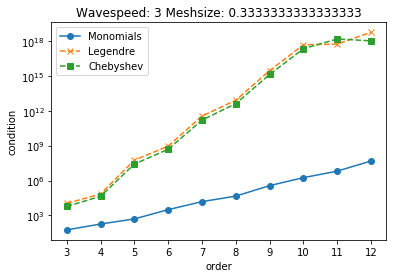

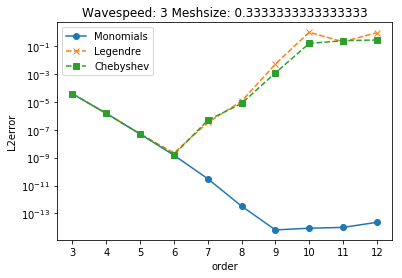

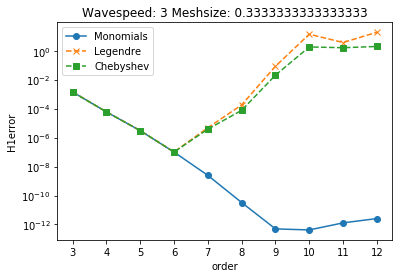

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

data = ['condition', 'L2error', 'H1error']
sol = np.array(solution)

for i in range(len(data)):
    fig = plt.figure()
    ax = fig.gca()
    plt.semilogy(sol[sol[:,0]==0,1], sol[sol[:,0]==0,i+2], '-o', label="Monomials")
    plt.semilogy(sol[sol[:,0]==1,1], sol[sol[:,0]==1,i+2], '--x', label="Legendre")
    plt.semilogy(sol[sol[:,0]==2,1], sol[sol[:,0]==2,i+2], '--s', label="Chebyshev")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title('Wavespeed: ' + str(c) + " Meshsize: " + str(1/N))
    plt.legend()
    plt.ylabel(data[i])
    plt.xlabel('order')
    plt.savefig("results/diffbasis_"+data[i]+".png")
    plt.show()